# Data Science 
***Uriel Isaac Álvarez Cárdenas***

# Tarea 1

- Descargar el archivo GCB2022v27_MtCO2_flat.csv de kaggle

- Explorar el dataset

 - desplegar nombres de columnas
 - tipo de datos
 - distribucion de NaNs

- ¿De cuántos países diferentes hay datos?

- Graficar los valores globales y los de Mexico para: 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita'.

- Extraer datos de los países pertenecientes al G20 y graficar las columnas del punto anterior.

 - Cuales son los 3 países que más contaminan en cada uno de los casos?
 - Considerando solo la emisión de los paises del G20, con que porcentaje contribuye México al Total y Per Capita?

- Eliminar NaNs.

- Aplicar merge, groupby.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [162]:
def graphics(Sections, df): 
    # Define the number of rows and columns for the subplots
    nrows = 4
    ncols = 2

    # Create a new figure and axis objects
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 18))

    # Flatten the axs array so we can iterate over it with a single index
    axs = axs.flatten()

    # Use a for loop to create a subplot for each column in the dataframe
    for i, column in enumerate(Sections):
        axs[i].plot(df[column])
        axs[i].set_title(column)

    # Set the tight layout to minimize overlapping of subplots
    plt.tight_layout()

    # Show the figure
    return plt.show()

In [163]:
df = pd.read_csv("GCB2022v27_MtCO2_flat.csv")
df.head(5)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [165]:
# Check for missing values 
df.isnull().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [166]:
dfMx = df.loc[df["Country"] == "Mexico"]
dfMx.head(5)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
36176,Mexico,MEX,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36177,Mexico,MEX,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36178,Mexico,MEX,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36179,Mexico,MEX,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36180,Mexico,MEX,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
dfMx.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,272.000000,272.000000,131.000000,131.000000,131.000000,94.000000,131.000000,0.0,72.000000
mean,1885.500000,75.689365,11.617025,102.748262,33.252211,7.438993,4.201143,NaN,3.170401
std,78.663842,143.795301,15.418486,105.925314,47.498058,7.145124,4.939285,NaN,1.111992
min,1750.000000,0.000000,0.494640,0.000000,0.000000,0.000000,0.000000,NaN,1.105343
25%,1817.750000,0.000000,1.732905,17.070847,0.000000,0.804994,0.000000,NaN,1.985626
50%,1885.500000,0.000000,2.821280,42.967728,2.476864,5.356549,2.612432,NaN,3.782891
75%,1953.250000,57.385582,15.157968,225.201809,52.684962,13.729798,7.458072,NaN,4.048475
max,2021.000000,501.568856,56.041308,291.123120,165.905920,22.339198,26.593312,NaN,4.494525


In [168]:
dfMx = dfMx[:].fillna(0)

In [169]:
dfMx.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.0,272.000000
mean,1885.500000,75.689365,5.594964,49.485376,16.014852,2.570828,2.023344,0.0,0.839224
std,78.663842,143.795301,12.159672,89.598160,36.868928,5.484648,4.015698,0.0,1.512468
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1817.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1885.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,1953.250000,57.385582,2.695832,42.210505,2.300282,0.834977,2.178264,0.0,1.238973
max,2021.000000,501.568856,56.041308,291.123120,165.905920,22.339198,26.593312,0.0,4.494525


Text(0.5, 0, 'Year')

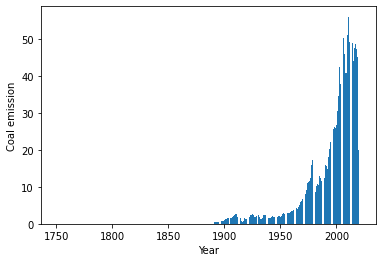

In [170]:
plt.bar(dfMx['Year'], dfMx['Coal'])
plt.ylabel('Coal emission')
plt.xlabel('Year')

Vemos que no hay registro antes de 1855 aproximadamente 

In [171]:
dfMxcl = df.loc[(df["Country"] == "Mexico") & (df["Year"] > 1890)]
dfMxcl = dfMxcl[:].fillna(0)
dfMxcl.head(5)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
36317,Mexico,MEX,1891,0.520288,0.520288,0.0,0.0,0.0,0.0,0.0,0.0
36318,Mexico,MEX,1892,0.578912,0.578912,0.0,0.0,0.0,0.0,0.0,0.0
36319,Mexico,MEX,1893,0.531280,0.531280,0.0,0.0,0.0,0.0,0.0,0.0
36320,Mexico,MEX,1894,0.538608,0.538608,0.0,0.0,0.0,0.0,0.0,0.0
36321,Mexico,MEX,1895,0.494640,0.494640,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Year')

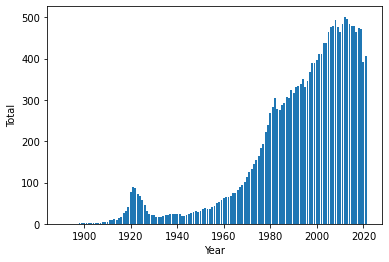

In [172]:
plt.bar(dfMxcl['Year'], dfMxcl['Total'])
plt.ylabel('Total')
plt.xlabel('Year')

In [173]:
dfMxcl = dfMxcl.set_index("Year")

In [174]:
Sections = dfMxcl.columns[2:]
Sections = Sections.values.tolist()
Sections

['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']

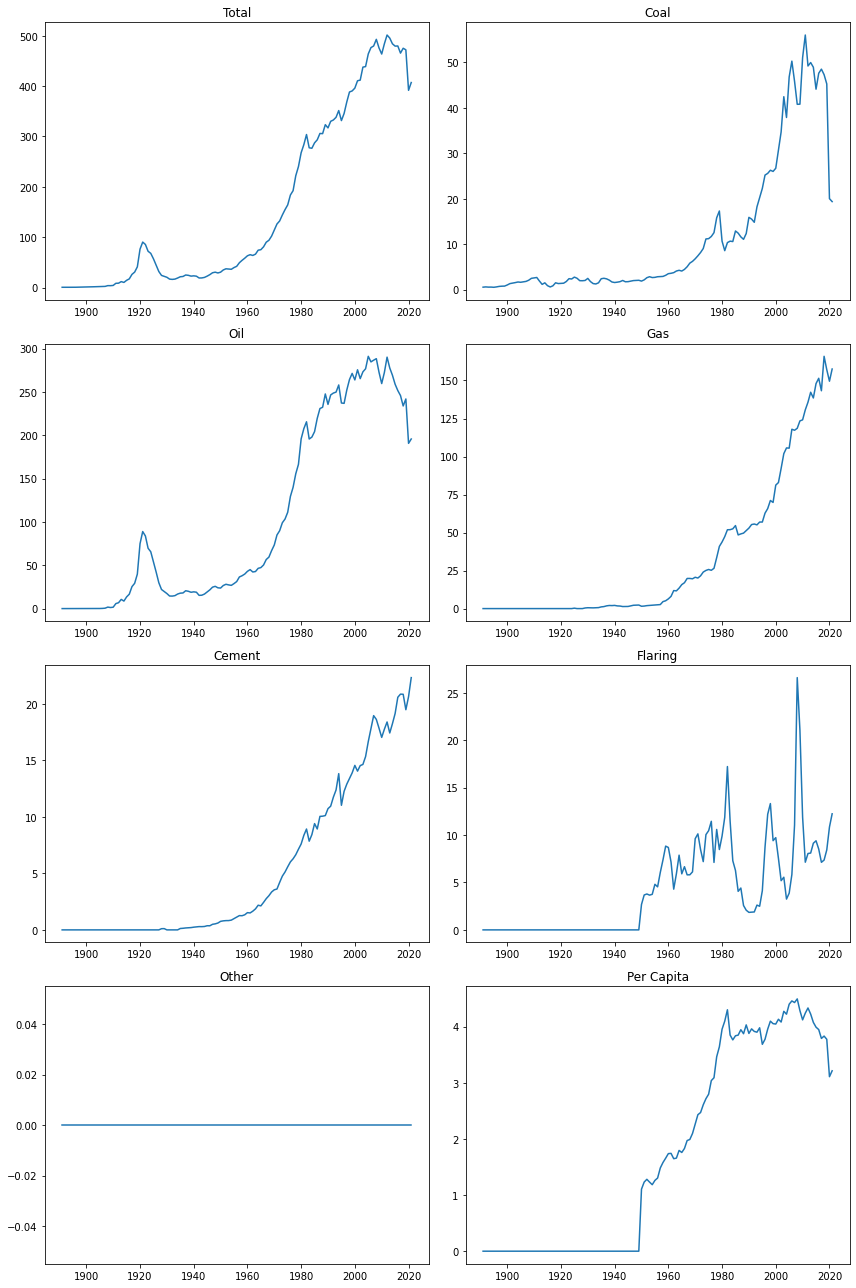

In [175]:
graphics(Sections, dfMxcl)

Esta claro que hay un problema con la columna "Other" ie no hay registro

In [176]:
dfGl=df.loc[df["Country"] == "Global"] 
dfGl.head(5)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62832,Global,WLD,1750,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011492
62833,Global,WLD,1751,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011438
62834,Global,WLD,1752,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011390
62835,Global,WLD,1753,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011339
62836,Global,WLD,1754,9.357856,9.357856,NaN,NaN,NaN,NaN,NaN,0.011294


In [177]:
dfGl.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,272.000000,272.000000,272.000000,167.000000,140.000000,142.000000,72.000000,32.000000,272.000000
mean,1885.500000,6385.772167,2956.581079,3625.609201,1814.698722,317.372713,256.309522,251.782569,1.494845
std,78.663842,10124.917164,3944.631584,4430.704084,2326.854738,453.690038,114.017646,35.326736,1.671295
min,1750.000000,9.350528,9.350528,0.036640,0.164880,0.000172,73.624416,213.078023,0.011249
25%,1817.750000,49.590408,49.590408,54.051075,36.137395,0.148120,159.925039,220.089699,0.046184
50%,1885.500000,1017.573406,991.485678,821.515974,431.635690,71.409084,250.638025,242.685408,0.669270
75%,1953.250000,6683.314570,4047.788751,8443.334578,3167.370656,435.955032,371.228432,294.627295,2.518943
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,4.887984


In [178]:
dfGl = dfGl.set_index("Year")
Sections = dfGl.columns[2:]
Sections = Sections.values.tolist()

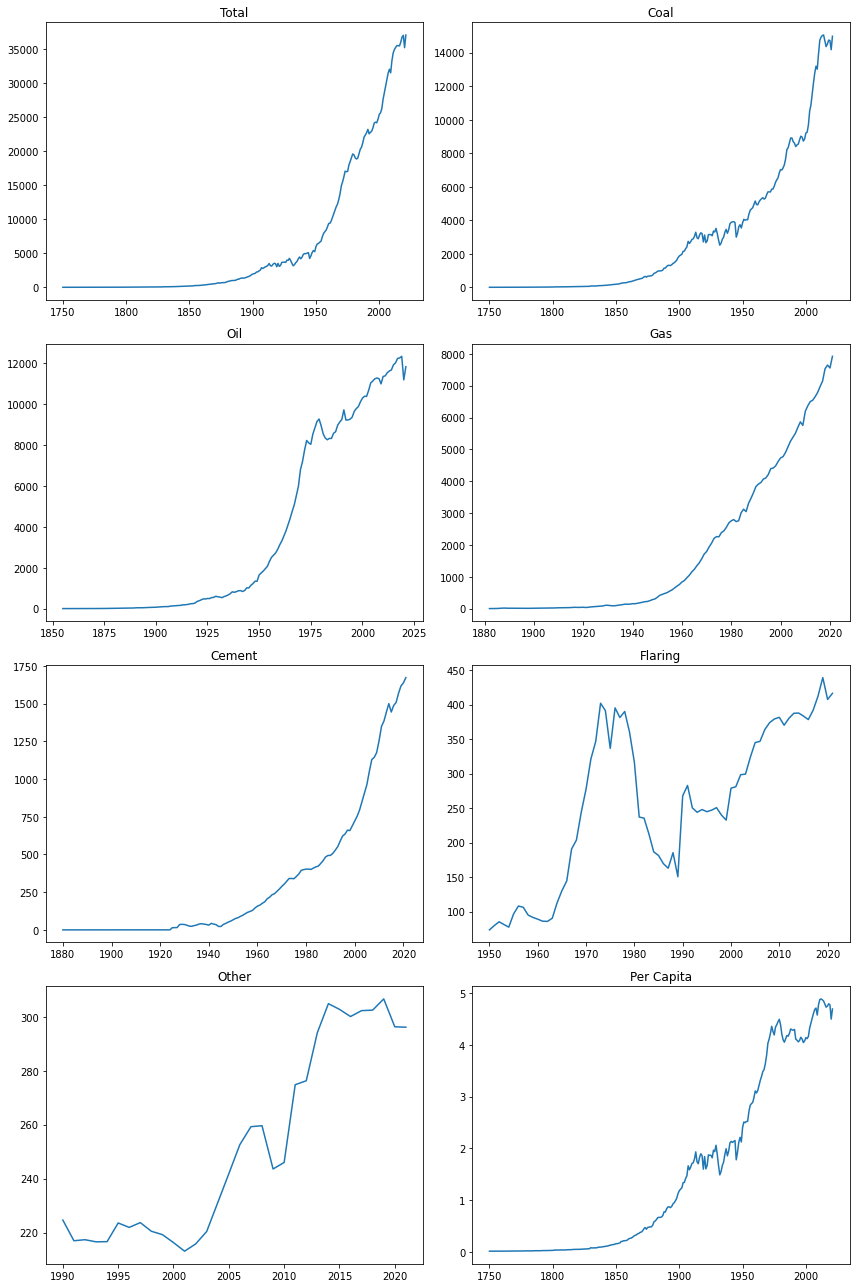

In [179]:
graphics(Sections, dfGl)

**Paises del G20**

Alemania, Arabia Saudí, Argentina, Australia, Brasil, Canadá, China, Estados Unidos, Francia, India, Indonesia, Italia, Japón, Reino Unido, República de Corea, México, Rusia, Sudáfrica,Turquía, Union Europea

In [180]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'North Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

In [181]:
# Omitire la union europea ya que no se encuentra en en df
G20 = ['Germany', 'Saudi Arabia', 'Argentina', 'Australia', 'Brazil', 'Canada', 
       'China', 'USA', 'France', 'India', 'Indonesia', 'Italy', 
       'Japan', 'United Kingdom', 'South Korea', 'Mexico', 'Russia', 
       'South Africa', 'Turkey']

Germany


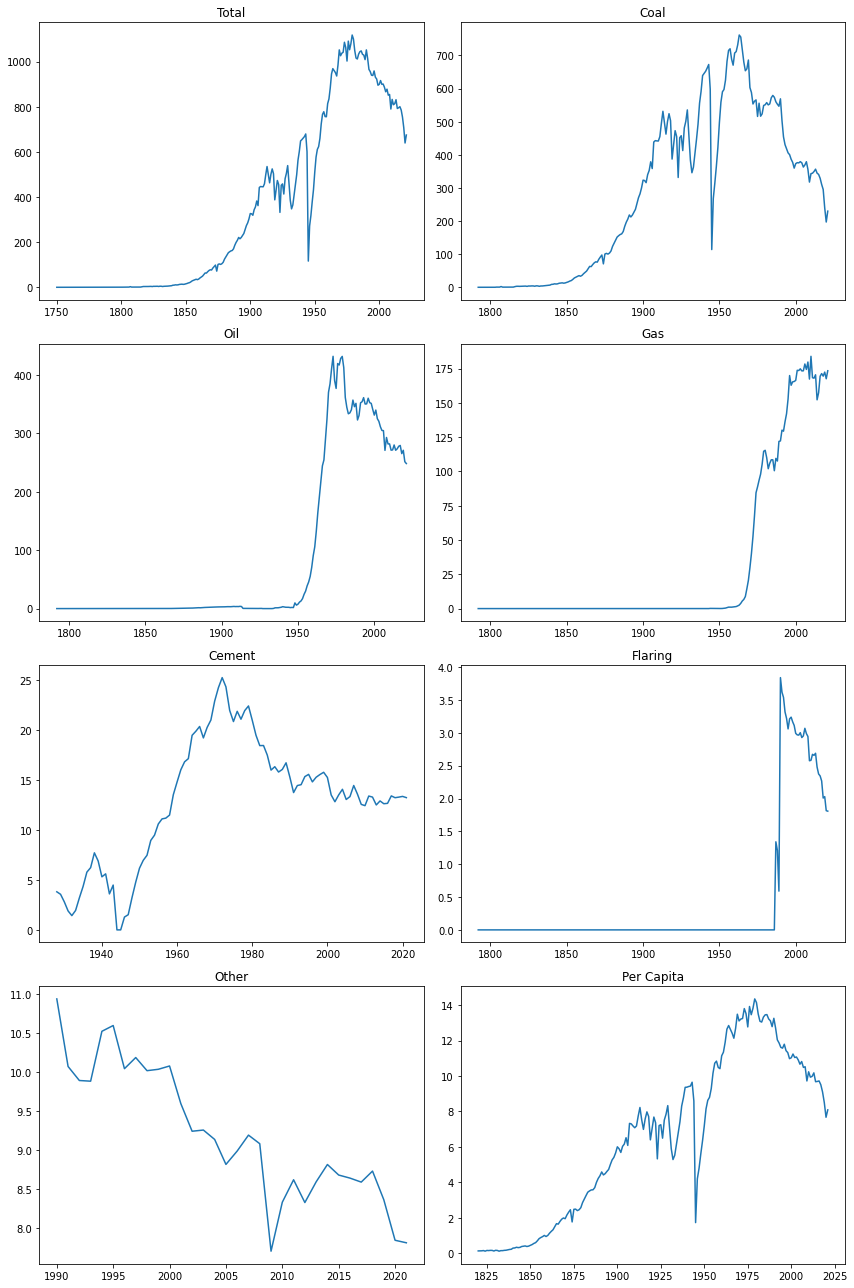

Saudi Arabia


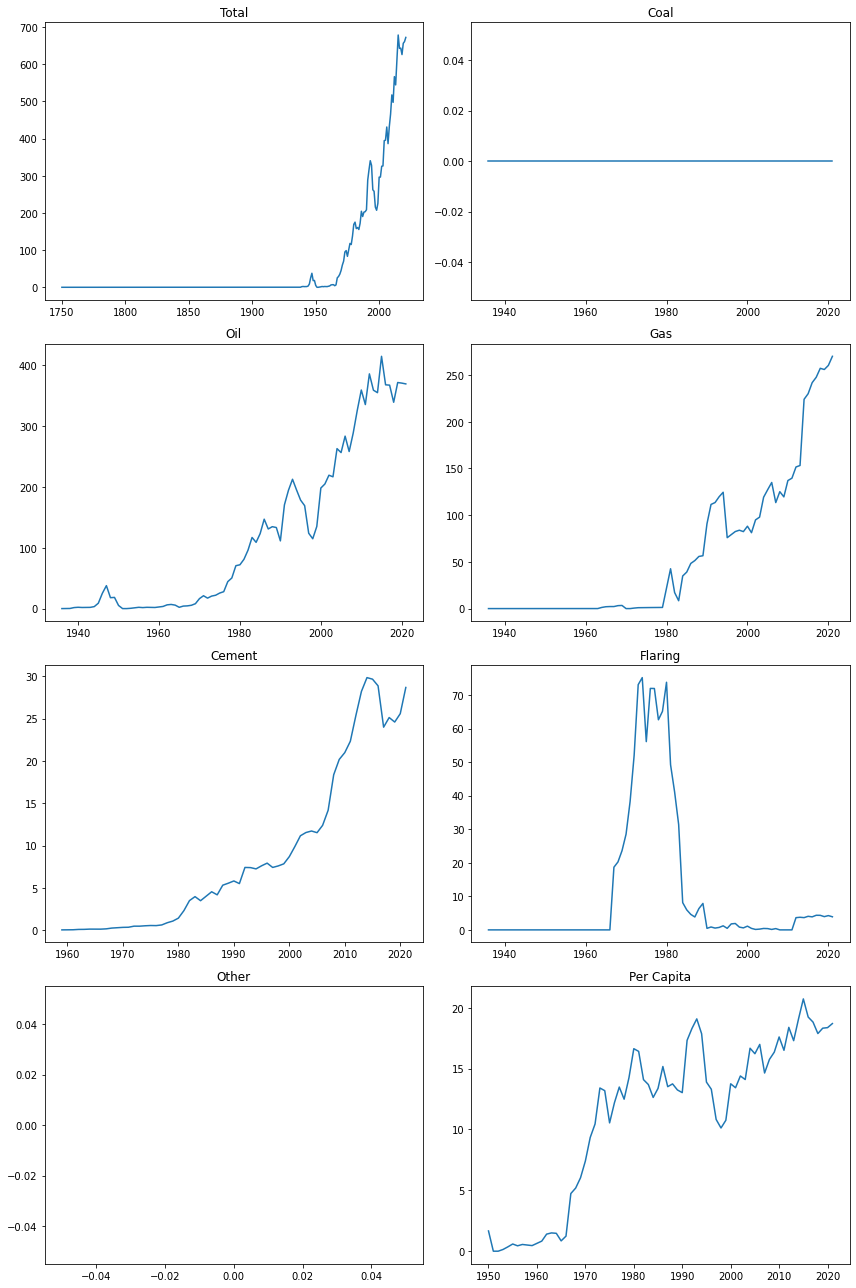

Argentina


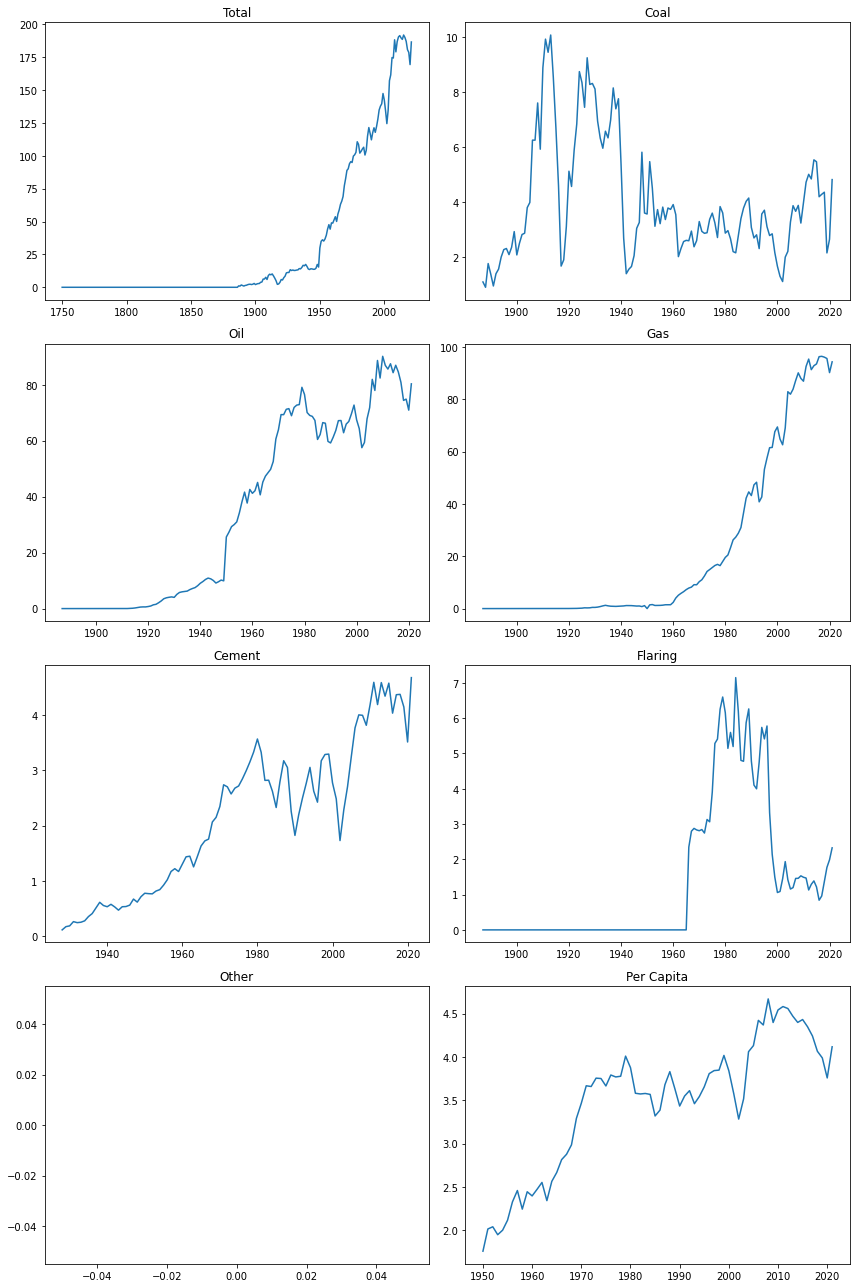

Australia


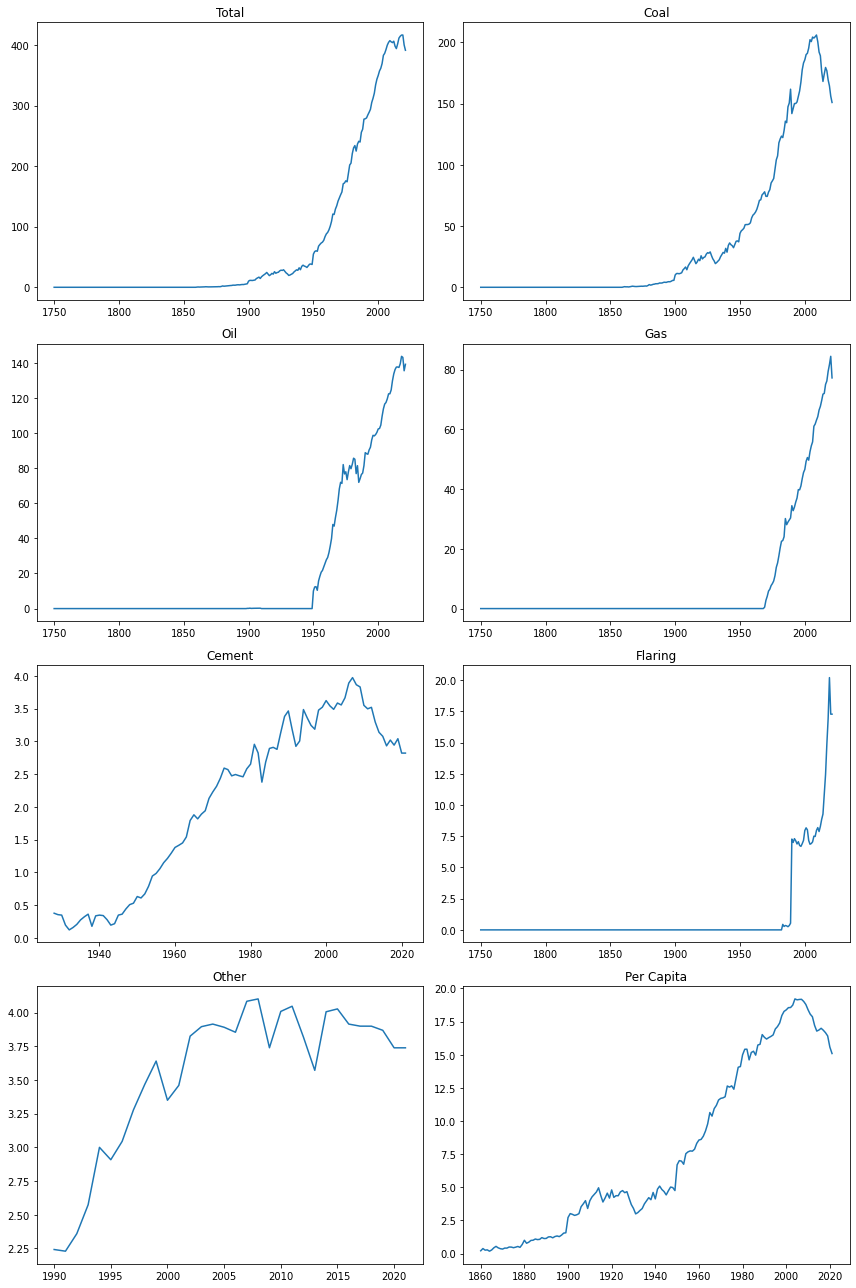

Brazil


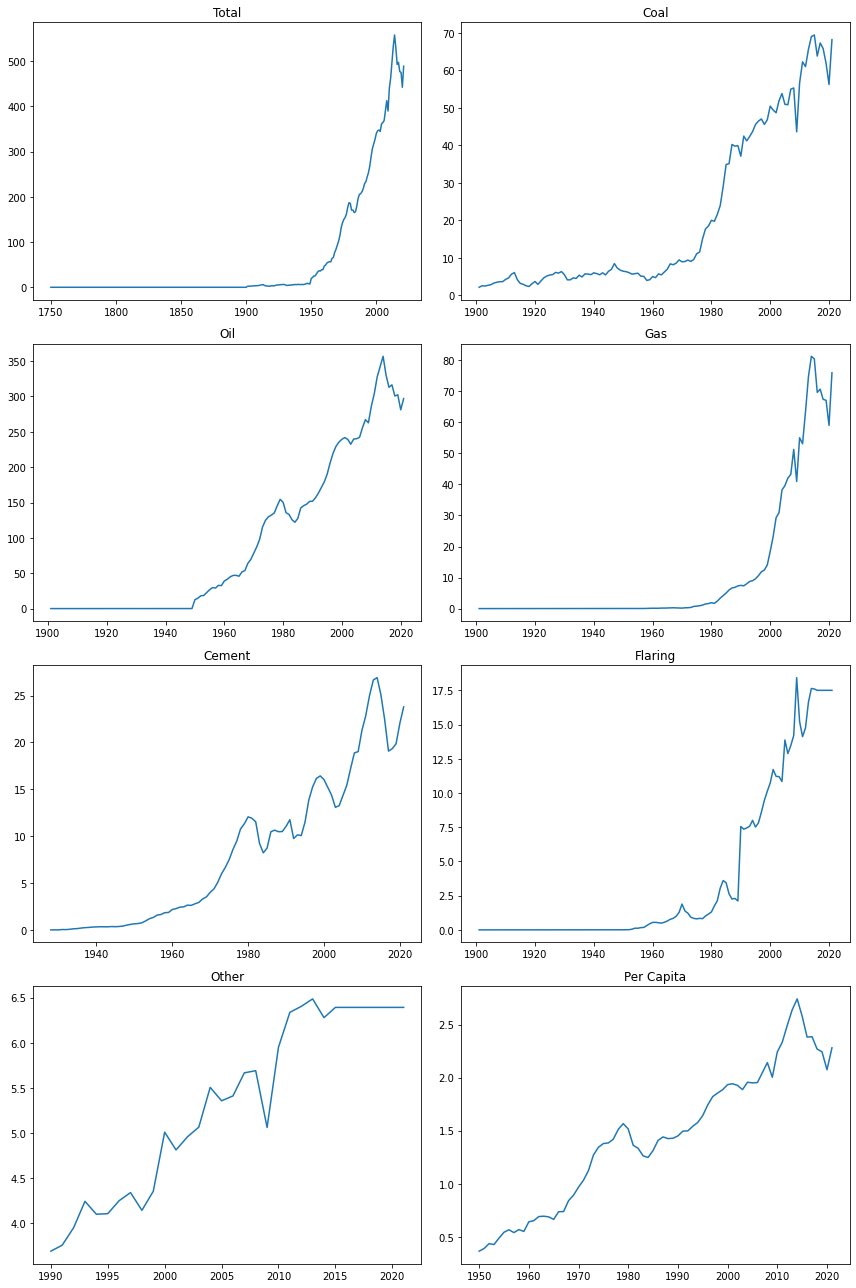

Canada


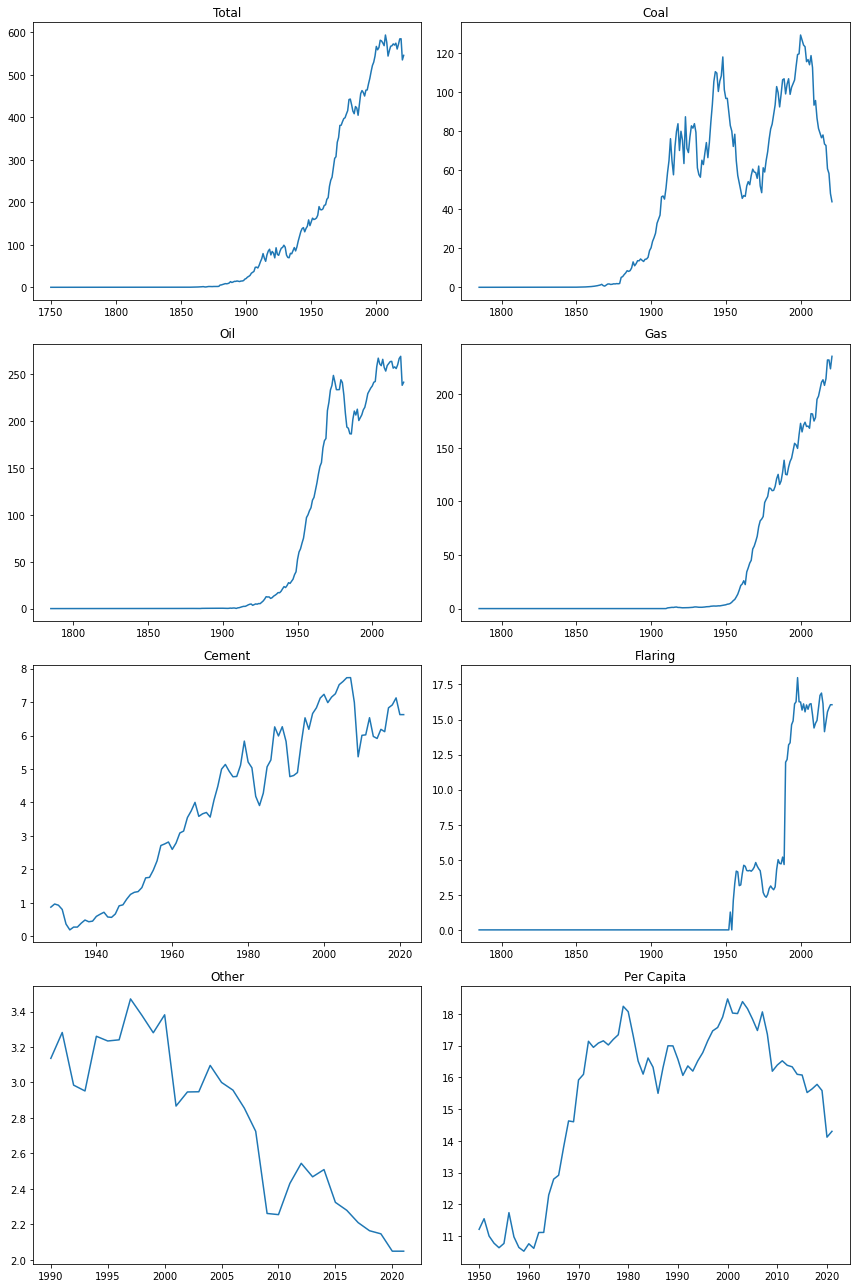

China


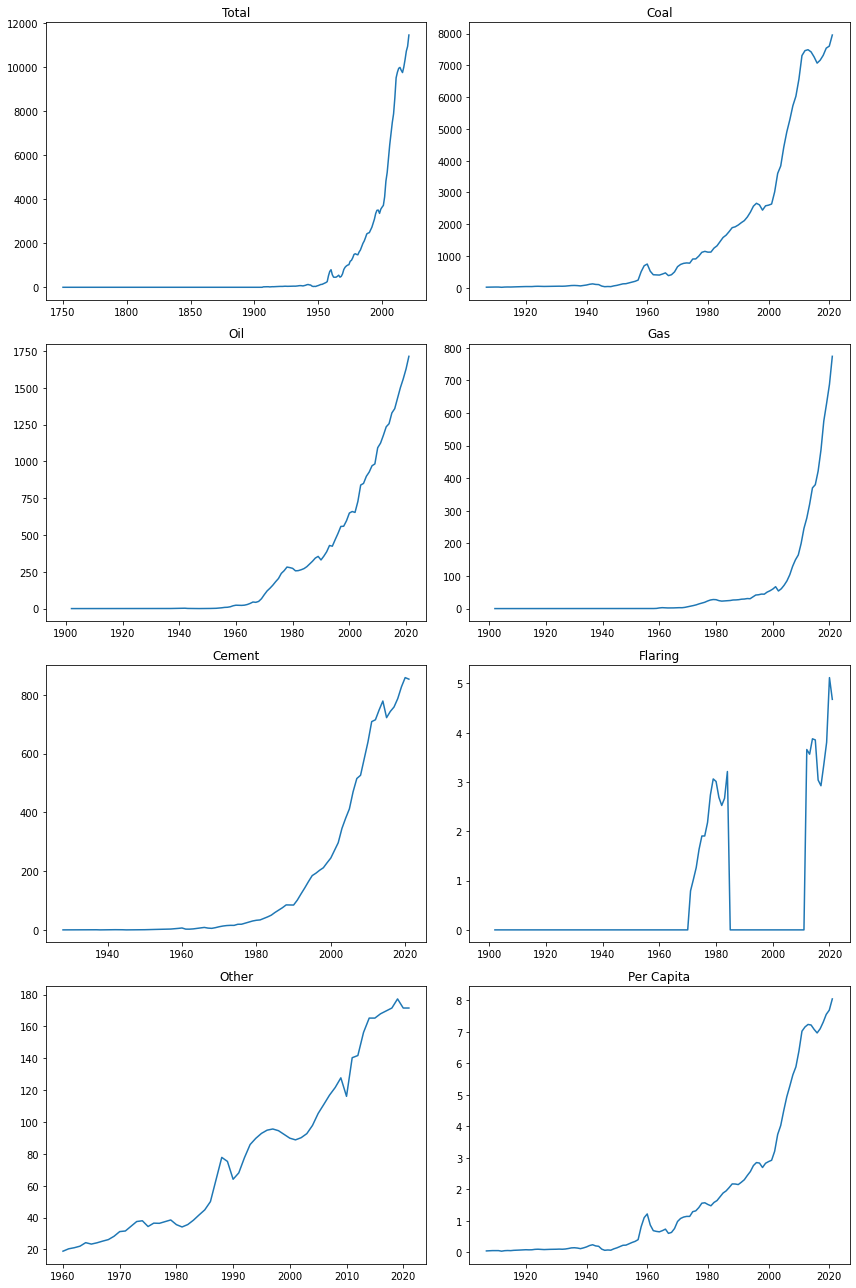

USA


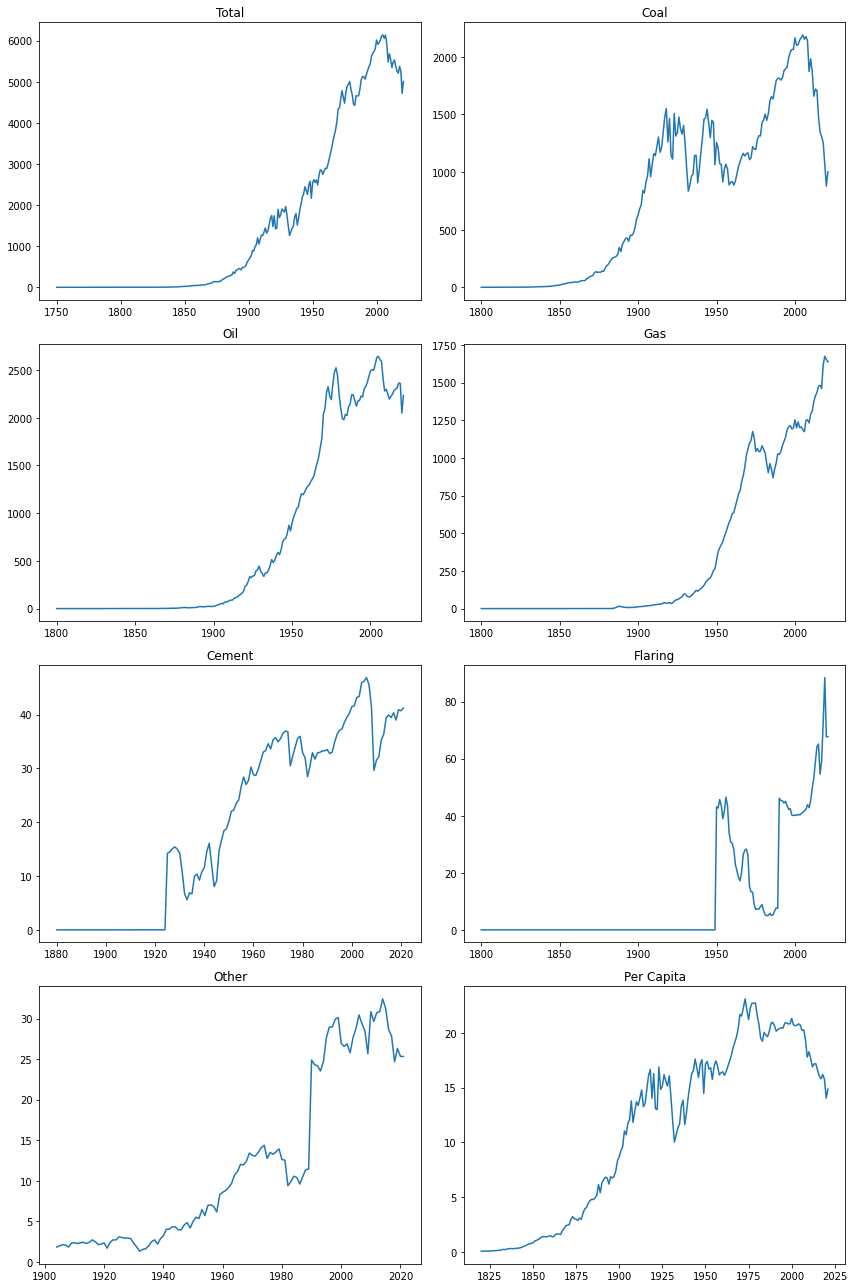

France


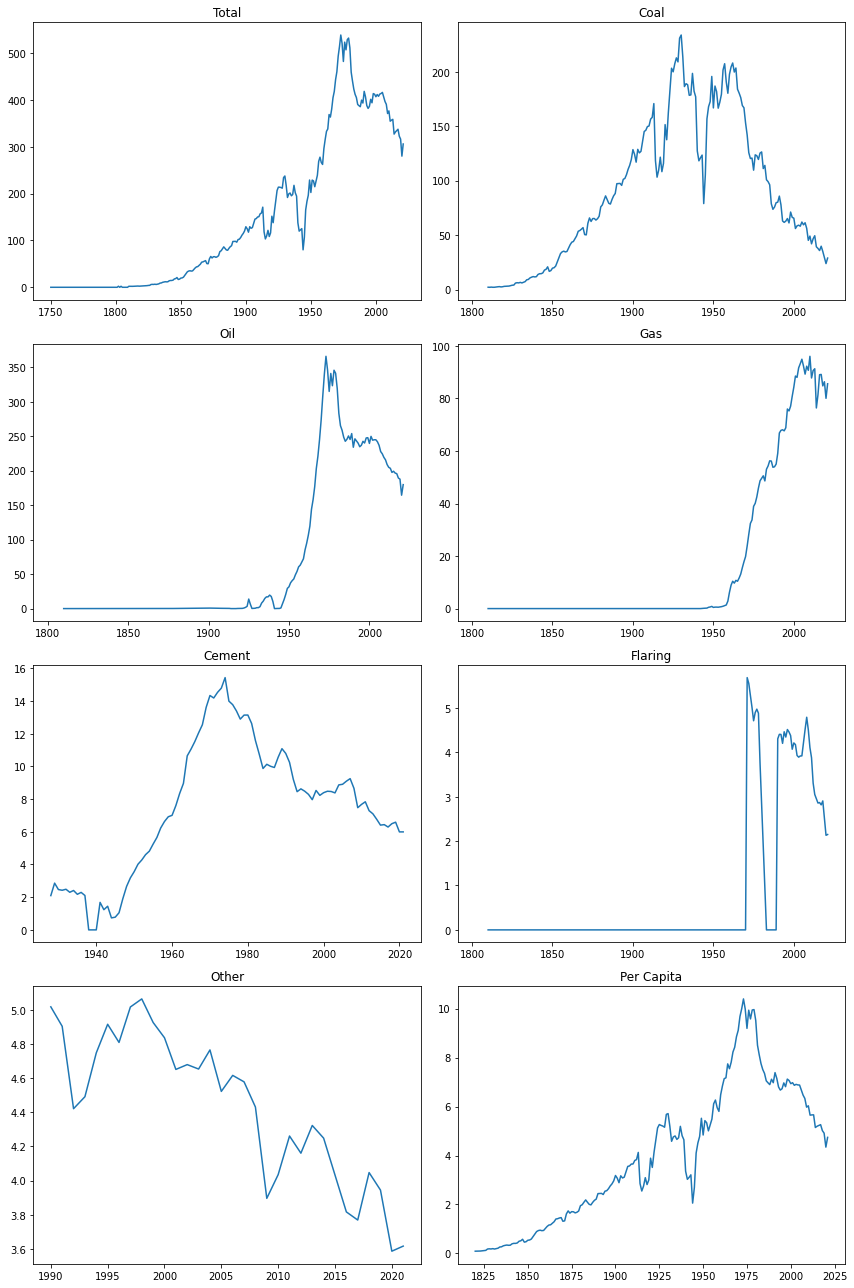

India


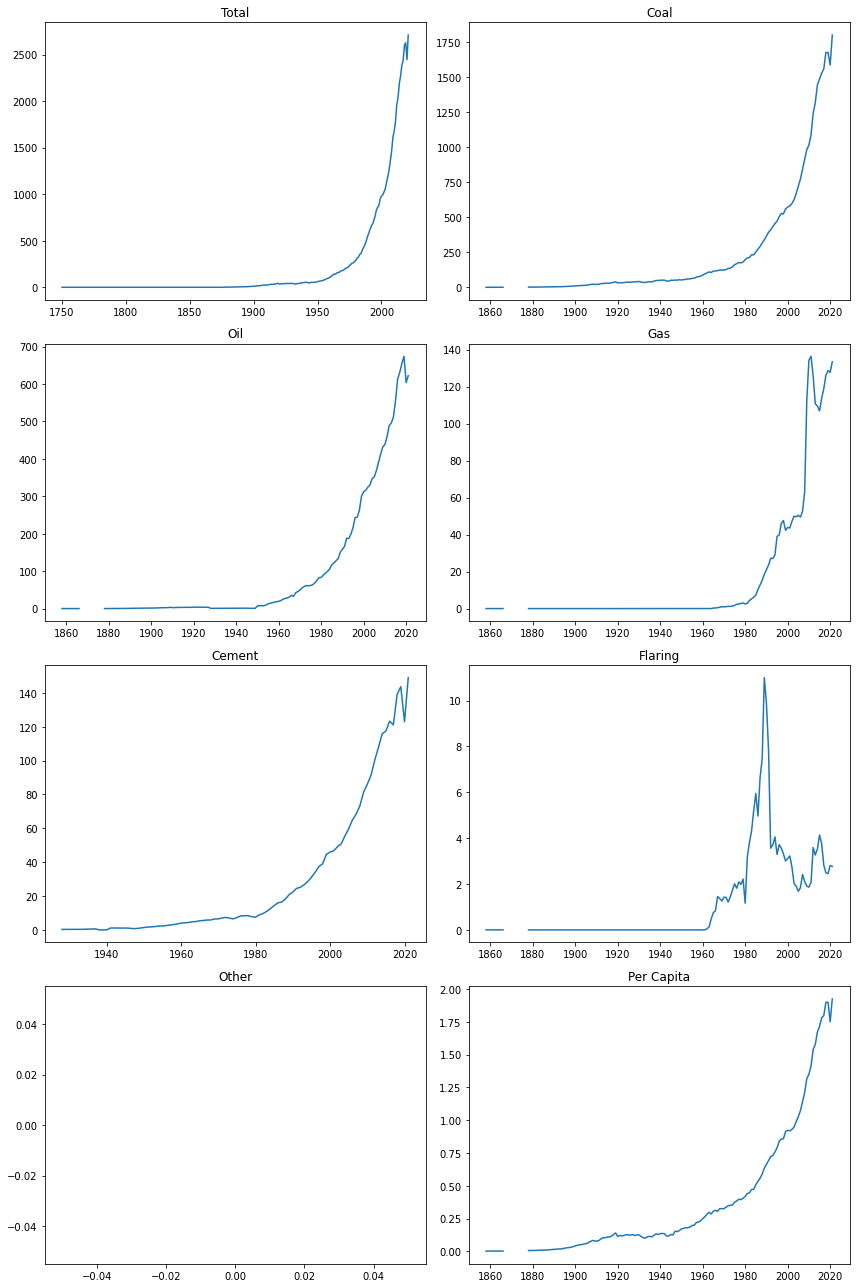

Indonesia


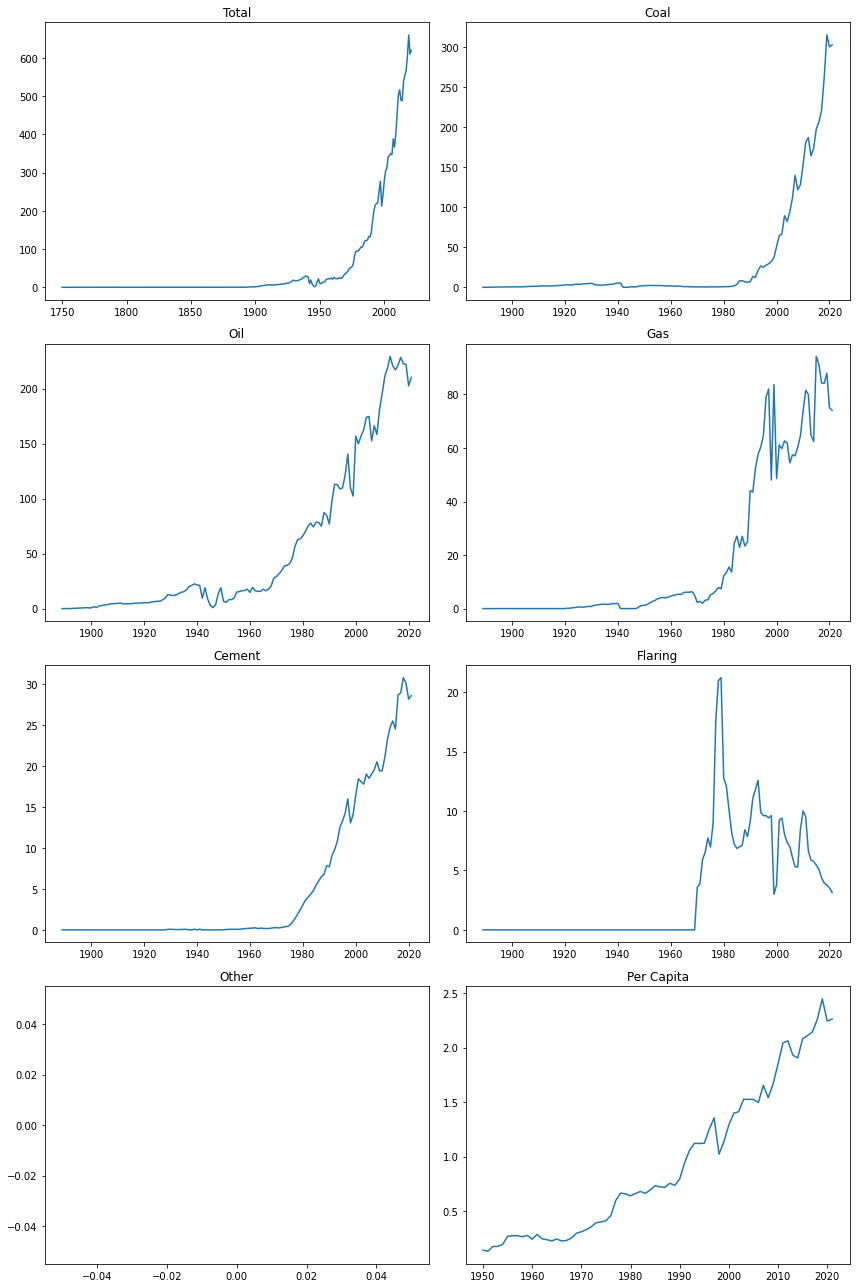

Italy


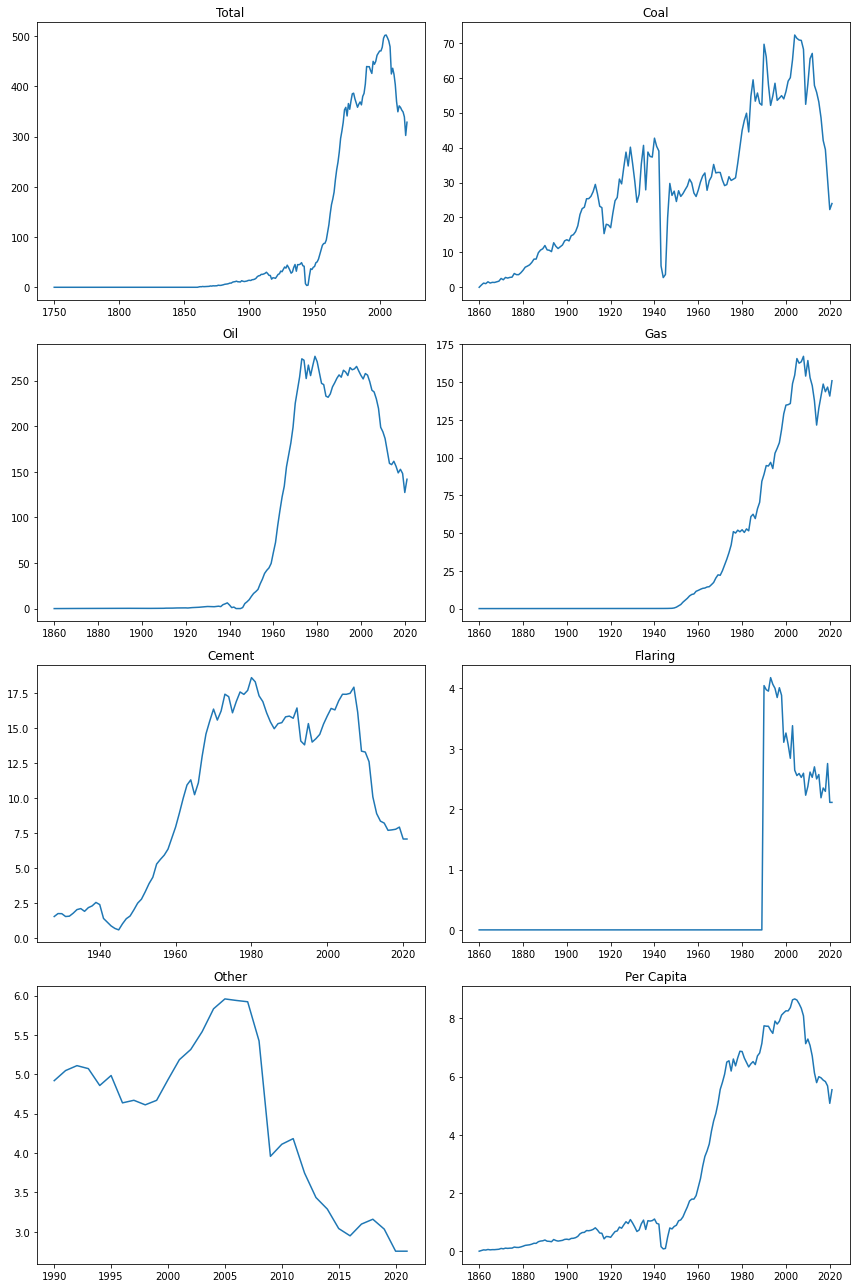

Japan


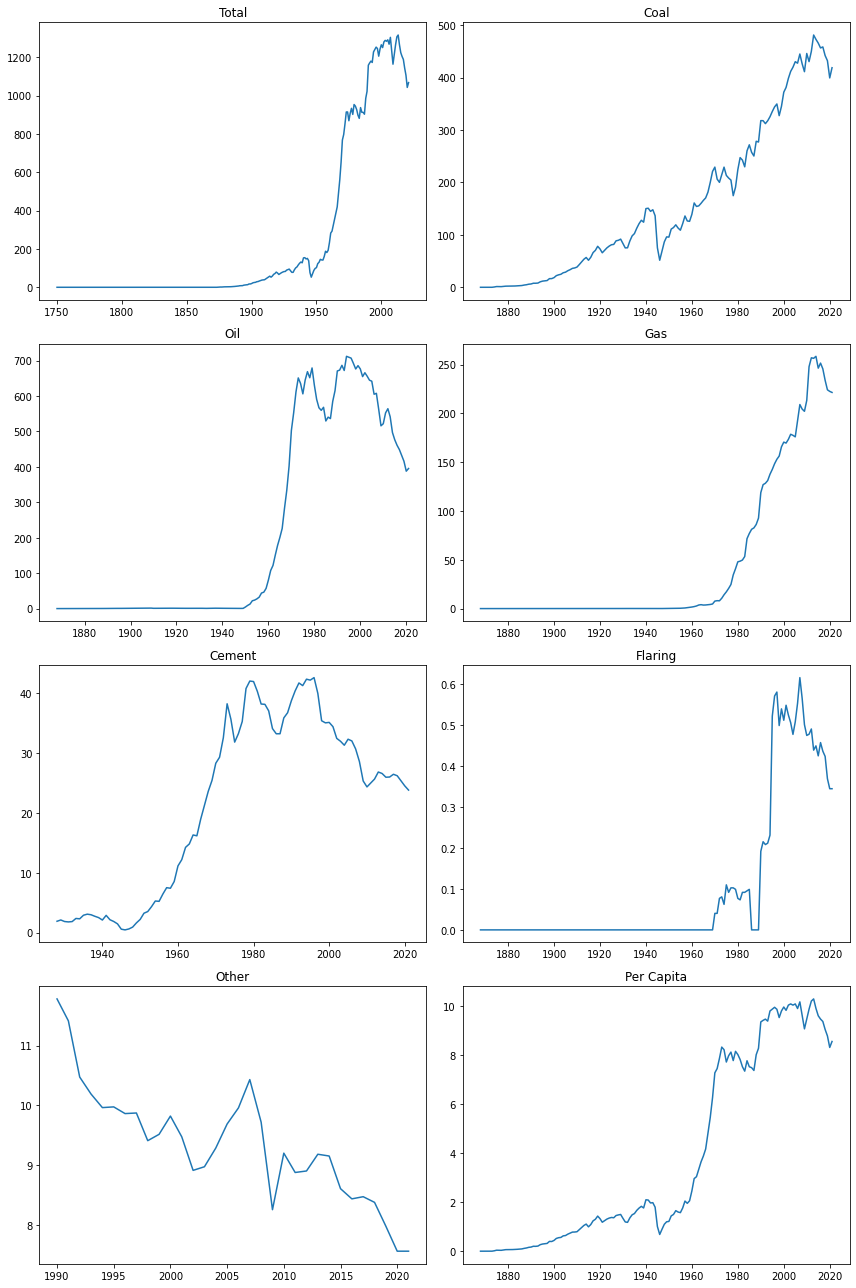

United Kingdom


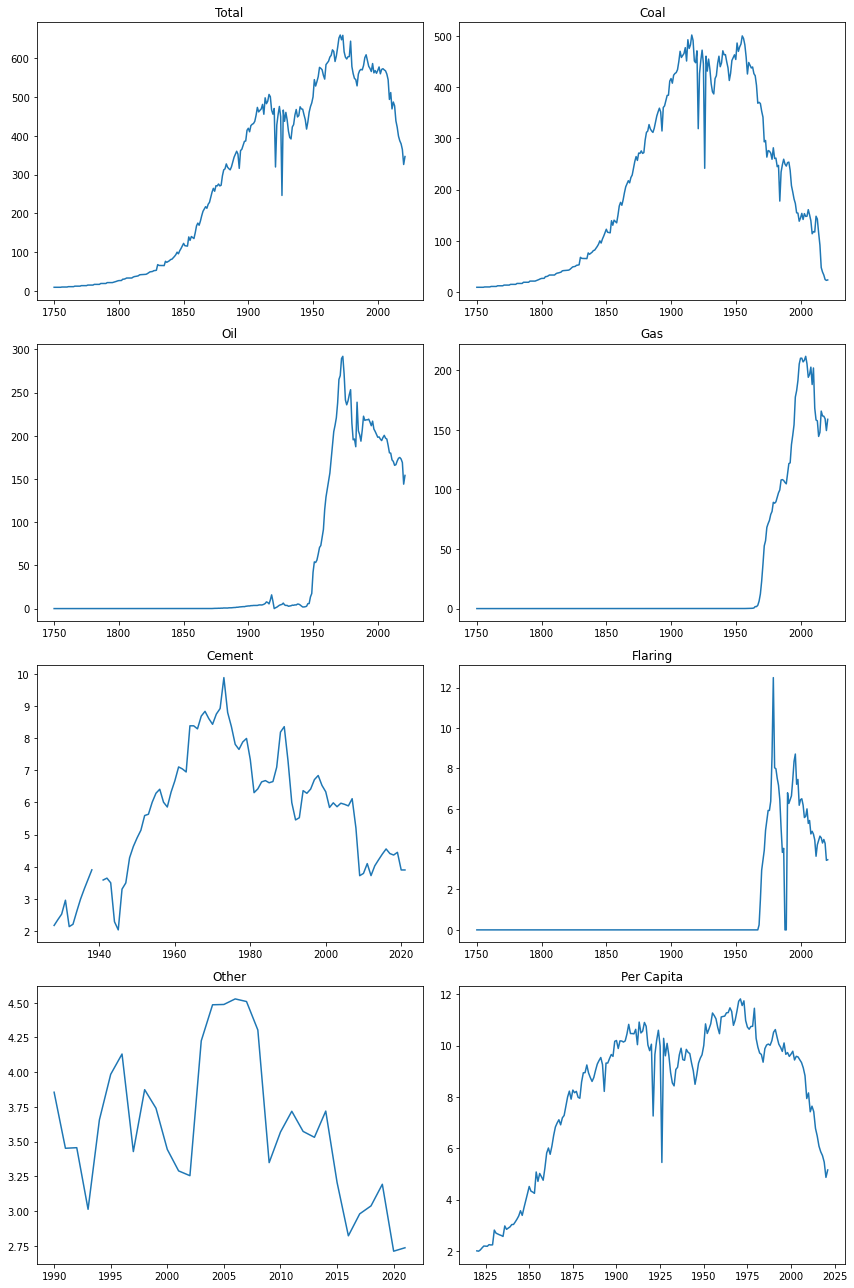

South Korea


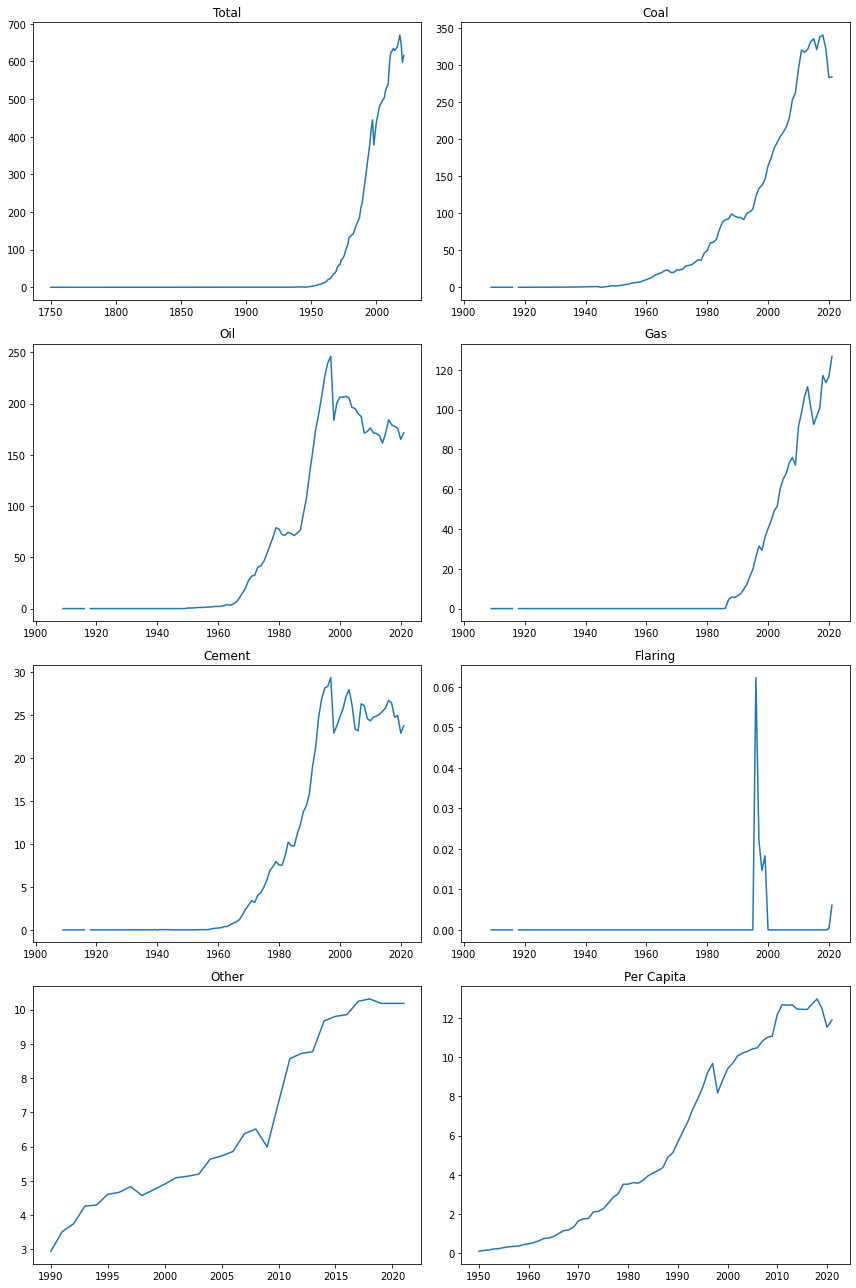

Mexico


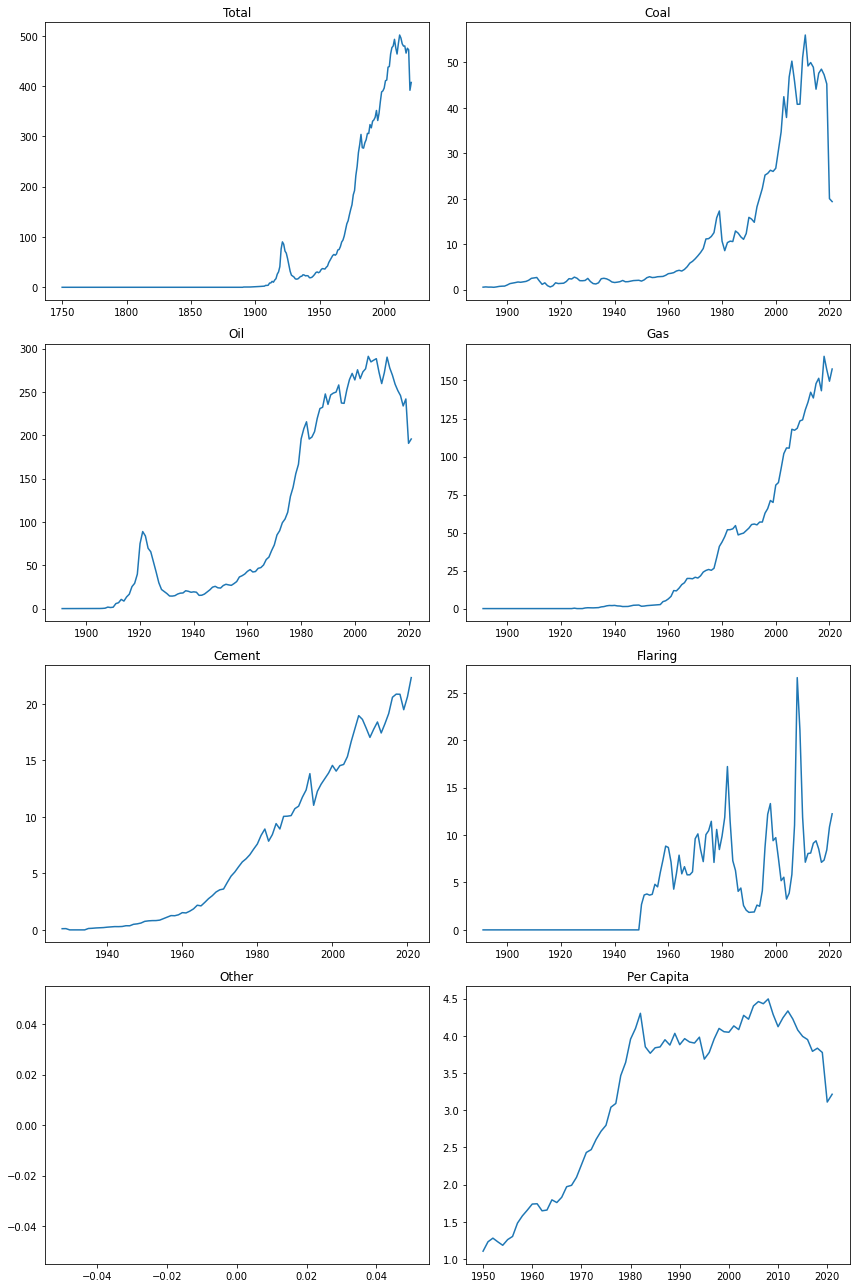

Russia


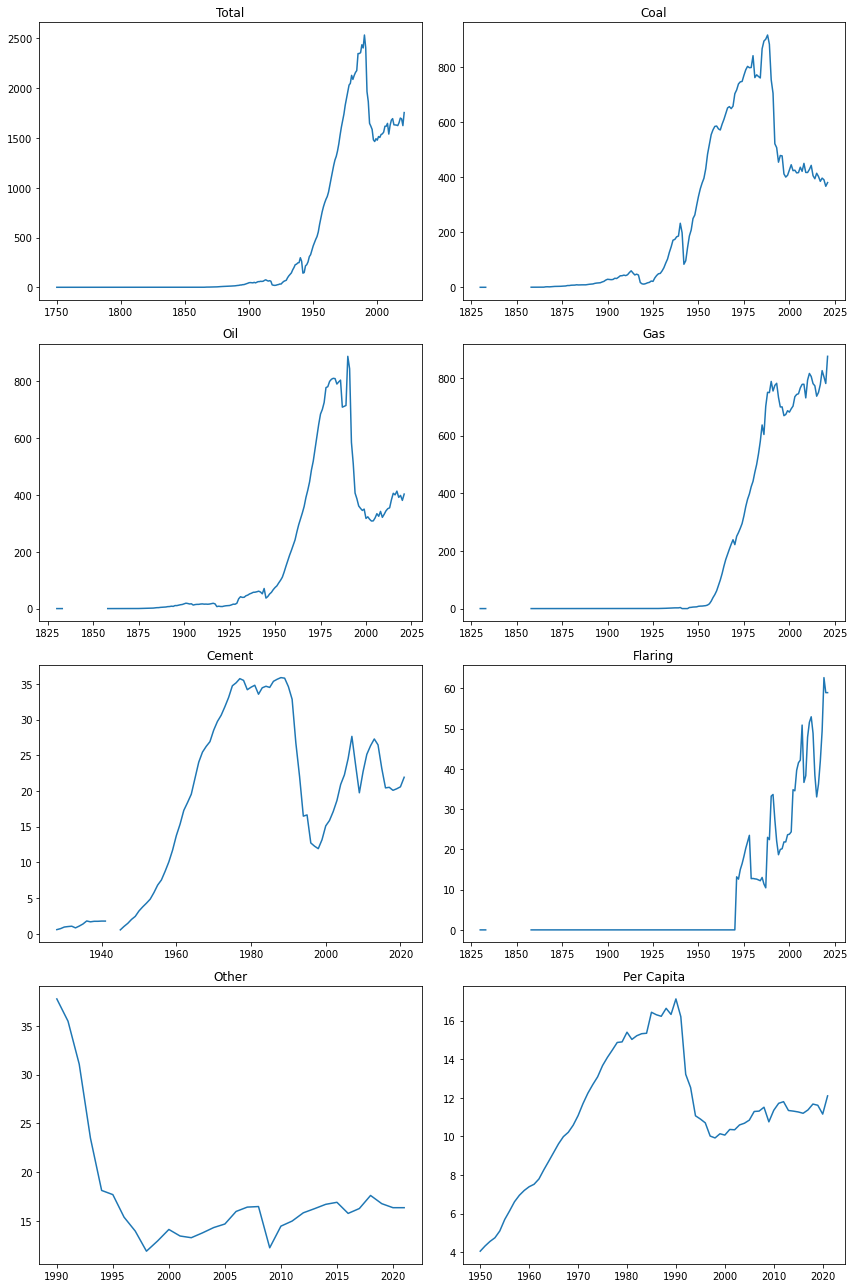

South Africa


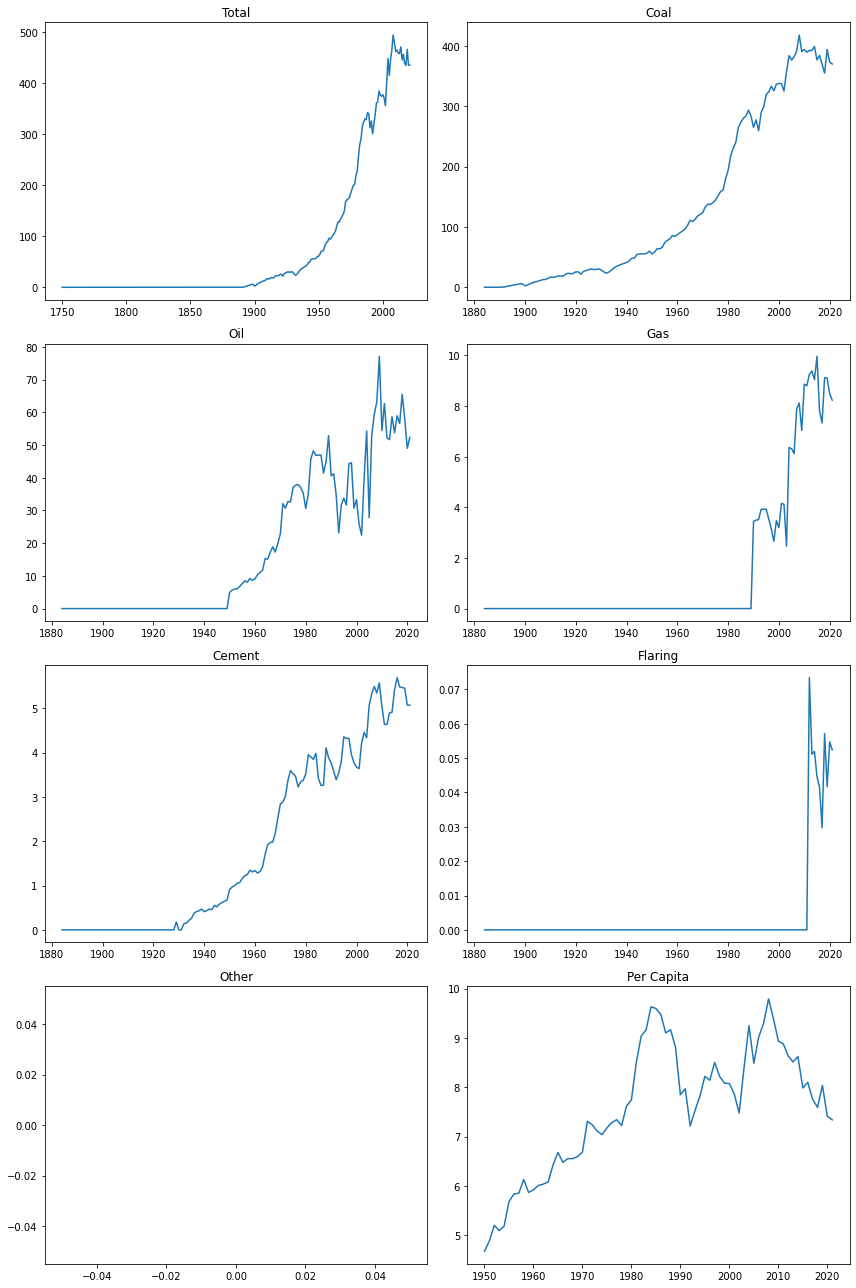

Turkey


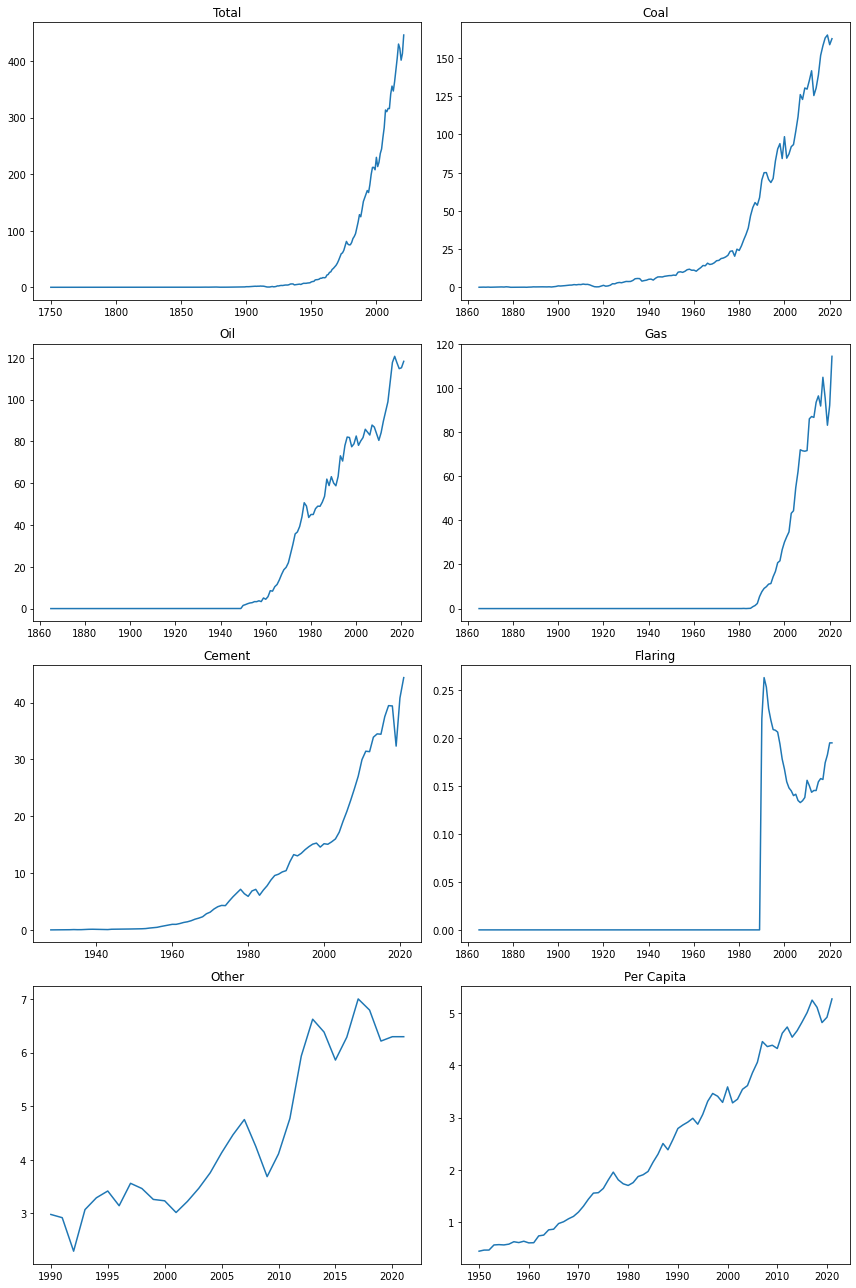

In [182]:
for i in G20:
  dfG20=df.loc[df["Country"] == i]
  dfG20 = dfG20.set_index("Year")
  print(i)
  graphics(Sections, dfG20)


In [183]:
# df with the info of G20
dfG20 = df[df['Country'].isin(G20)]

In [184]:
for section in Sections:
    df_ordenado = dfG20.sort_values(by=section, ascending=False)
    print(section)
    print(df_ordenado['Country'].unique()[:3])

Total
['China' 'USA' 'India']
Coal
['China' 'USA' 'India']
Oil
['USA' 'China' 'Russia']
Gas
['USA' 'Russia' 'China']
Cement
['China' 'India' 'USA']
Flaring
['USA' 'Saudi Arabia' 'Russia']
Other
['China' 'Russia' 'USA']
Per Capita
['USA' 'Saudi Arabia' 'Australia']


Considerando solo la emisión de los paises del G20, con que porcentaje contribuye México al Total y Per Capita?

In [185]:
# Create the Total for compare with Mexico
total = dfG20.sum()
total["Country"] = 'TotalG20'
total['ISO 3166-1 alpha-3'] = 'TOT'
dfG20 = dfG20.append(total, ignore_index=True)
dfG20["Country"].unique()
# isn't necesary append

<ipython-input-185-ccdd888bee52>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfG20 = dfG20.append(total, ignore_index=True)


array(['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France',
       'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico',
       'South Korea', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey',
       'United Kingdom', 'USA', 'TotalG20'], dtype=object)

In [186]:
for section in Sections:
  sumTot = total[section].sum()
  dfG20Mx = dfG20.loc[dfG20['Country'] == 'Mexico']
  sumMX = dfG20Mx[section].sum()
  percentMx = (sumMX / sumTot) * 100
  print('Mexico contribuye al {:.2f}% de {}.'.format(percentMx, section))


Mexico contribuye al 1.55% de Total.
Mexico contribuye al 0.23% de Coal.
Mexico contribuye al 3.20% de Oil.
Mexico contribuye al 2.36% de Gas.
Mexico contribuye al 2.07% de Cement.
Mexico contribuye al 6.62% de Flaring.
Mexico contribuye al 0.00% de Other.
Mexico contribuye al 1.75% de Per Capita.


Para los ejemplos de Merge y Groupby voy a cargar un segundo dataset con informacion sobre la poblacion

In [187]:
dfp = pd.read_csv('world_population.csv')
dfp.head(3)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


In [188]:
dfp = dfp.rename(columns={'Country/Territory': 'Country'})
dfp['Population'] = dfp[list(dfp.columns[5:12])].sum(axis=1)
dfp.head(3)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Population
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,184768581
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,20923788
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,238786462


In [189]:
df = pd.merge(df, dfp[['Country', 'Population']], on='Country')
df.head(3)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Population
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184768581
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184768581
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184768581


- Con esto conseguimos tambien tener informacion sobre la poblacion del pais que puede ser un dato útil

- Cabe reasltar que es mejor no eliminar los NaNs ya que perderia mucha informacion y es mejor tratar los datos como lo hice con Mexico pero ello requiere un analisis mas detallado

In [190]:
# group the data by "Country" and "Year"
grouped_data = df.groupby(["Country", "Year"])

# calculate the sum of Coal emissions for each group
summed_data = grouped_data["Coal"].sum()

# print the resulting data
summed_data

Country      Year
Afghanistan  1750    0.000000
             1751    0.000000
             1752    0.000000
             1753    0.000000
             1754    0.000000
                       ...   
Zimbabwe     2017    5.900452
             2018    7.177776
             2019    6.888320
             2020    6.721571
             2021    7.225620
Name: Coal, Length: 54944, dtype: float64